In [106]:
def nums_visualisation(df,annotation=False):
    '''
    визуализация распределений количественных признаков: 
        - гисторгамма распределения 
        - boxplot распределения
    '''
    columns = df.columns
    cols_num = df.shape[1]

    fstr = '\033[1m{}\033[0m, '* (len(columns)-1) + '\033[1m{}\033[0m'
    if annotation: 
        print(('Всего признаков этого типа {}.\nК ним относятся: ' + fstr).
              format(len(columns),*columns))
    
    indent = 0.05
    fig = plt.figure(figsize=(14,3))
    for i,col in enumerate(columns):
        row = df[col]
        min_diff = pd.Series(row.unique()).sort_values().diff().min()
        bins = min(int((row.max()-row.min()) /min_diff + 1),100)
        
        fig.add_axes([1/cols_num*i, 0.35, 1/cols_num-indent, 1])
        plt.title(col)
        row.plot.hist(bins=bins,density=True)
    
        fig.add_axes([1/cols_num*i, 0, 1/cols_num-indent, 0.2])
        sns.boxplot(x=row)

    plt.tight_layout()
    
def num_visualisation(column,df, left_sloping=False):
    '''
    Визулизация распределения количественного ризнака:
        - гистограмма распределения в валидационной и в полной обучающей выборке 
        - boxplot распределения в валидационной и в полной обучающей выборке
        - гистограмма распределения  в валидационной выборке и в обучающей выборке на марках, 
        встречающихся в валидационной выборке
        - boxplot рапсределения в валидационной выборке и в обучающей выборке на марках, 
        встречающихся в валидационной выборке
    '''
    warnings.filterwarnings("ignore")
    
    trn = df[df['sample']==1].dropna(subset=[column,'price'])
    tst = df[df['sample']==0].dropna(subset=[column])
    tst_brands = tst.brand.unique()
    brand_mask = [x in tst_brands for x in trn.brand]
    trn_ = trn[brand_mask]
    
    row_trn = trn[column] 
    row_tst = tst[column] 
    row_trn_ = trn_[column]     

    if left_sloping: 
        max_val = max(row_trn.max(),row_tst.max(),row_trn_.max())
        row_trn = np.log(max_val + 1 - row_trn)
        row_tst = np.log(max_val + 1 - row_tst)
        row_trn_ = np.log(max_val + 1 - row_trn_)        
    else:
        row_trn = np.log(row_trn+1)
        row_tst = np.log(row_tst+1)
        row_trn_ = np.log(row_trn_+1)
    
    fig = plt.figure(figsize=(14,3.5))
    
    nbins = 50
    rows_max = max(row_trn.max(),row_tst.max())
    rows_min = min(row_trn.min(),row_tst.min())    
    step = (rows_max-rows_min)/nbins
    bins = list(np.arange(rows_min,rows_max,step))
#*****************************ax1***********************************
    ax1 = fig.add_axes([0, 0.5, 0.65, 1])
    plt.title('Распределение '+column+' в train\n (на всех марках) и в test' )
    row_trn.plot.hist(bins=bins,density=True,alpha = 0.7,histtype='step',linewidth=5)
    row_trn_.plot.hist(bins=bins,density=True,alpha = 0.7,histtype='step',linewidth=5)    
    row_tst.plot.hist(bins=bins,density=True,alpha = 0.7,histtype='step',linewidth=5)
    plt.legend(['full train','train with brand from test','test']) 
#*****************************ax2***********************************
    ax2 = fig.add_axes([0, 0, 0.65, 0.40]) 
    sns.boxplot(data = [row_trn,row_trn_,row_tst],orient='h',saturation = 0.5)
#     sns.boxenplot(data = [row_trn.values,row_trn_.values,row_tst.values],orient='h',saturation = 0.5)
#*****************************ax3***********************************    
    ax3 = fig.add_axes([0.7, 0, 0.30, 1.5])
    plt.title('Зависимость цены\n от '+column+' в ранговом представлении')
    x = rankdata(row_trn)
    y = rankdata(trn.price)
    ax3.set(xlim=(x.min(), x.max()), ylim=(y.min(), y.max()))
    sns.kdeplot(x, y,
                   shade=True, shade_lowest=False)
    plt.show()
#***************************p-value*********************************    
    print("p-value теста Стьюдента о равенстве средних у распределений "+ \
          column +" в train на брендах, встречающихся в test и в test:",\
          ttest_ind(row_tst,row_trn_)[1] )
    
def features_price_scatterplot(column):
    fig, ax = plt.subplots(1,len(most_popular_brands), figsize=(16, 6))
    for i,brand in enumerate(most_popular_brands):
        tmp = data[data.brand==brand]
        ax[i].scatter(x = tmp[column], y = tmp.offerprice, alpha=0.3)
        ax[i].set_title('для автмобилей марки ' + brand)
        ax[i].set_xlabel(column)
        ax[i].set_ylabel("offerprice")
        ax[i].set_yscale( "log")
    plt.show()

def features_price_scatterplot(df,stud_column,top_column, n_top):
    top = df[top_column].value_counts().index[:n_top]    
    fig, ax = plt.subplots(1,len(top), figsize=(20, 4))
    
def features_price_scatterplot(df,stud_column,top_column, n_top):
    top = df[top_column].value_counts().index[:n_top]    
    fig, ax = plt.subplots(1,len(top), figsize=(20, 4))

    for i,cat_val in enumerate(top):
        tmp = df[df[top_column]==cat_val]
        x = tmp[stud_column]
        y = tmp.price
        ax[i].scatter(x = x, y = y, alpha=0.3)
        ax[i].set_title('для '+ top_column + ' ' + str(cat_val))
        ax[i].set_xlabel(stud_column)
        ax[i].set_ylabel("price")
#         ax[i].set_yscale( "log")
        xmarg = 0.1*(x.max() - max(x.min(),0))
        ax[i].set_xlim(left=max(x.min(),0)-xmarg,right = x.max()+xmarg)
#         ax[i].set_xmargin(0.2)
    plt.show(x.max())    

## Импорт бибилиотек

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime
from datetime import date
from sklearn.feature_selection import f_regression, mutual_info_regression
from functools import reduce
from scipy.stats import spearmanr, rankdata, ttest_ind

import warnings

# %pylab 
%matplotlib inline

from project_7_functions import *

## Установка параметров и определение констант

In [53]:
from project_7_constants import *

warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 70)    # выведем больше строк
pd.set_option('display.max_columns', 30) # выведем больше колонок

##  Загрузка даных

In [54]:
df_kaggle = pd.read_csv(f'{path}auto_ru_2020_09_09.csv',low_memory=False)
df_kaggle_full = pd.read_csv(f'{path}all_auto_ru_09_09_2020.csv',low_memory=False)

test = pd.read_csv(f'{path}test.csv',low_memory=False)

In [55]:
# test.columns

## Приведение к единому виду

In [56]:
%%time 
externdata_test = externdata_test_unification(test)
# externdata_train = externdata_train_unification(df_kaggle)
externdata_train_full = externdata_train_unification(df_kaggle_full)

Wall time: 2min 46s


## Объединение test и train

In [57]:
# externdata_train['sample'] = 1  # помечаем где у нас трейн
externdata_train_full['sample'] = 1  # помечаем где у нас трейн
externdata_test['sample'] = 0   # помечаем где у нас тест
externdata_test['price'] = np.NaN  # в тесте нет значения price -  пока просто заполняем np.NaN
# объединяем
# externdata = externdata_test.append(externdata_train, sort=False).reset_index(drop=True) 
externdata_full = externdata_test.append(externdata_train_full, sort=False).reset_index(drop=True) 

## EDA
Разделим признаки на количественные `num_cols` , категориальные `cat_cols` и бинарные `bin_cols`.   
К бинарным, очевидно, отнесем признаки с двумя уникальными значениями.  
Категориальными признаками будем считать признаки с количеством уникальных значений от 3 до 27 а также очевидно категориальные название модели и марку автомобиля.   
Порогом для количественного признака будет наличие более чем 27 уникальных значений. При этом учитываем, что название модели и марку автомобиля из количественных признаков мы исключили.  


In [58]:
# Посмотри обьекты какого типа находятся теперь в колонках датасета.
externdata_full.apply(lambda x: type(x.iloc[0]))

bodyType                 <class 'str'>
brand                    <class 'str'>
color                    <class 'str'>
engineDisplacement     <class 'float'>
enginePower              <class 'int'>
equipment_dict          <class 'list'>
fuelType                 <class 'str'>
mileage                  <class 'int'>
modelDate                <class 'int'>
model_name               <class 'str'>
numberOfDoors            <class 'int'>
productionDate           <class 'int'>
vehicleTransmission      <class 'str'>
vendor                   <class 'str'>
Владельцы              <class 'float'>
Владение                 <class 'int'>
ПТС                      <class 'str'>
Привод                   <class 'str'>
Руль                     <class 'str'>
sample                   <class 'int'>
price                  <class 'float'>
dtype: object

Всё прилично, кроме `equipment_dict`, котрый содержит list опций. На этом этапе приведем этот признак к количеству опций. 

In [59]:
externdata_full.equipment_dict = externdata_full.equipment_dict.apply(len)

Определяем кличество уникальных знчений в каждой колонке и относим признак к соответсвующему типу данных (преобразвание `astype(str)` необходимо для избежания `TypeError: ("unhashable type: 'list'", 'occurred at index equipment_dict')`)

In [60]:
num_uniq = externdata_full.astype(str).nunique()

In [61]:
bin_cols = externdata_full.columns[num_uniq==2].drop('sample')
cat_cols = externdata_full.columns[(num_uniq>2) & (num_uniq<28)].append(pd.Index(['model_name','brand'])) 
num_cols = externdata_full.columns[num_uniq>=28].drop(['model_name','brand','price'])

## Целевая переменная

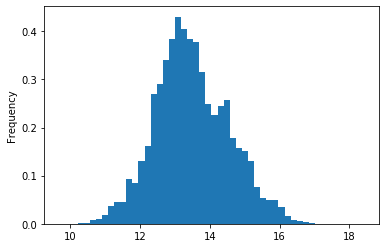

In [62]:
nbins = 50
np.log(externdata_full.price+1).plot.hist(bins=nbins,density=True)

In [63]:
externdata_full.price = np.log(externdata_full.price+1)

Рассмотрим признаки по типам
### Количественные
Ознакомимся с распределением всех признаков (гистограмма и boxplot на всем dataset)

Всего признаков этого типа 7.
К ним относятся: engineDisplacement, enginePower, equipment_dict, mileage, modelDate, productionDate, Владение


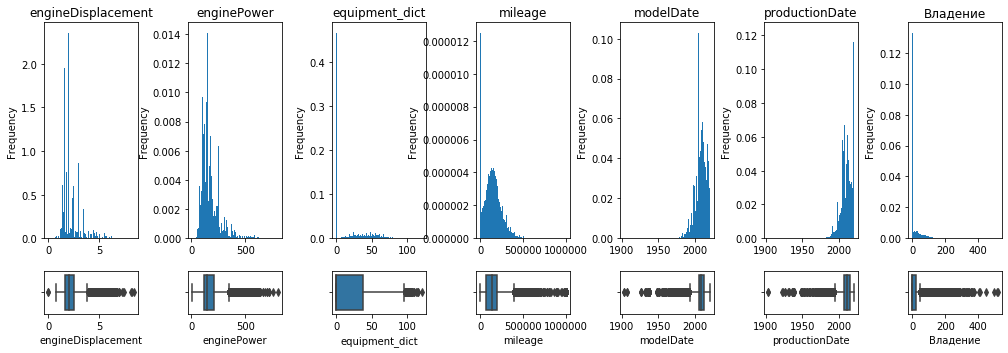

In [64]:
nums_visualisation(externdata_full[num_cols],annotation=True)

Как видим все количественные признаки имеют скошенное распределение:
- **engineDisplacement**, **enginePower**, **equipment_dict**,**mileage** и **Владение** скошены вправо;
- **modelDate**, **productionDate** скошены влево.   
    
Если бы мы испопльзовали модели, чувствтельные к ненормальности распределения признаков, следовало провести преобразование, например логарфимрование и наверное стандартизацию. Но я собираюсь использовать модели, строящий градиентный бустинг над деревьями. Этот класс алгоритвмов нечувствителен к ненормальнотис, поэтому преобразование проводит не имеет смысла. Ну мы и не будем.
    
Попробуем выявить заисимости между числовыми признаками, для этого постоим pairplot и посчитаем матрицу корреляций Спирмена (диаганальные 1-цы уберем, чтобы не мешали).

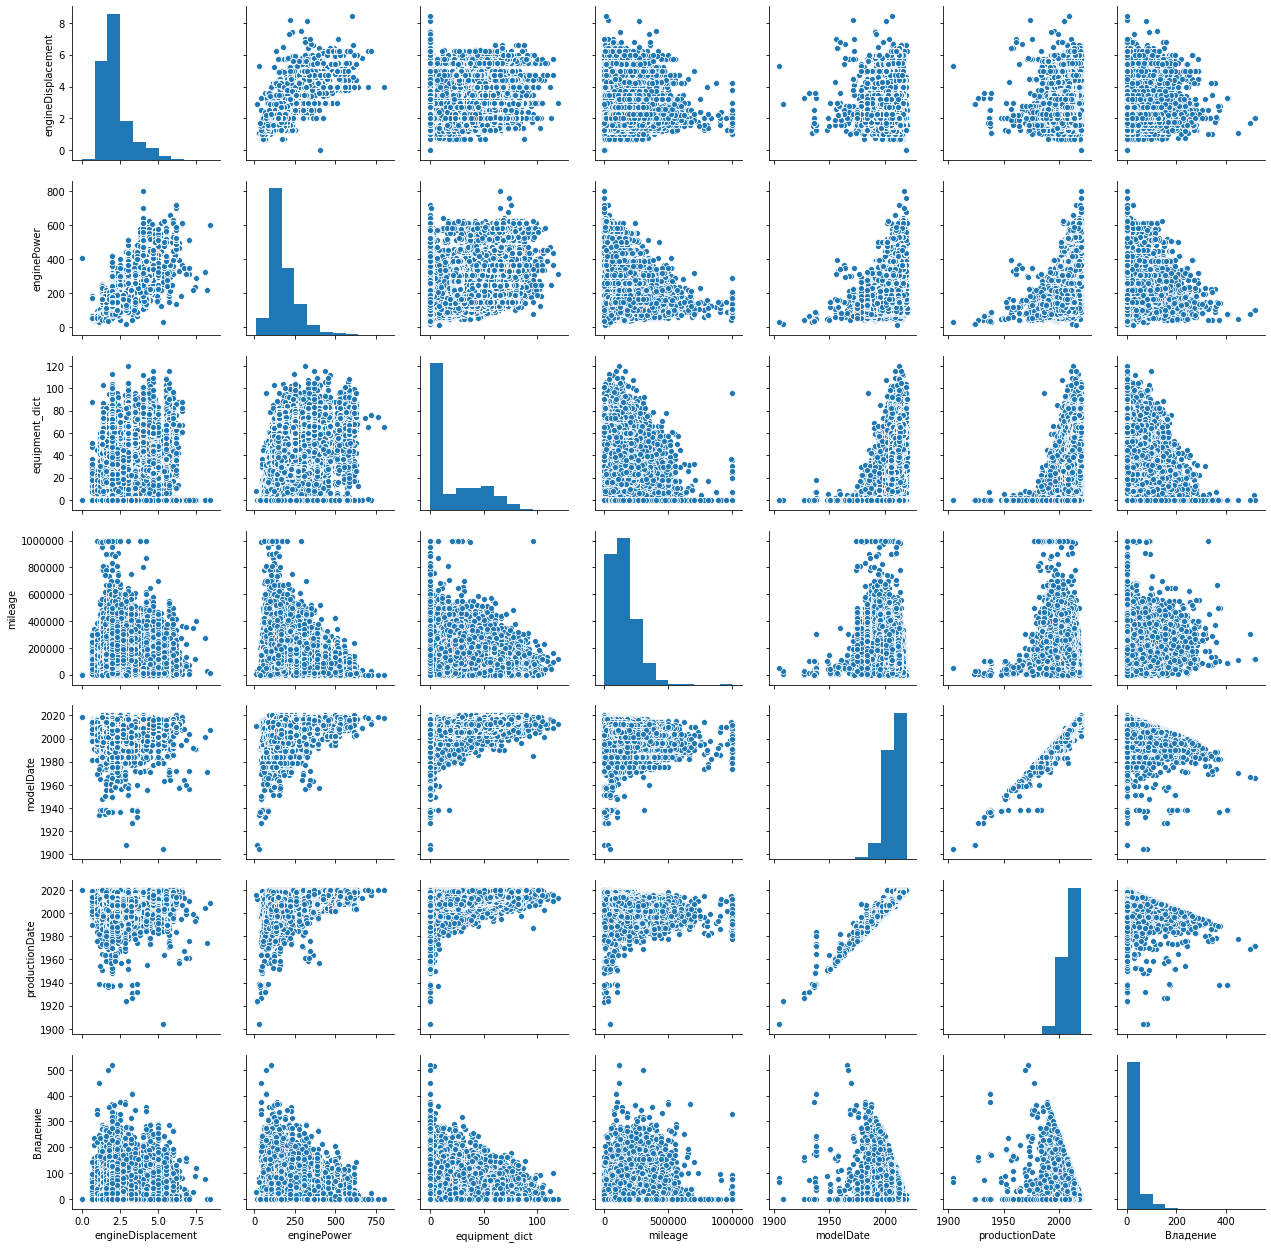

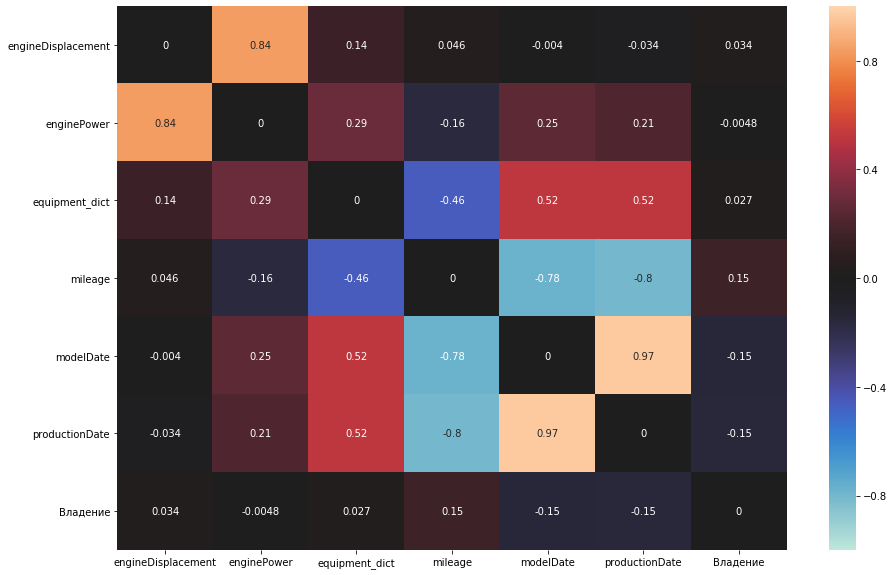

In [65]:
sns.pairplot(externdata_full[num_cols]);
corr_matrix = externdata_full[num_cols].corr(method='spearman')-np.eye(len(num_cols))
plt.figure(figsize = (15,10));
sns.heatmap(corr_matrix, annot = True,vmin=-1, vmax=1, center= 0);

Стоит отметить наличие заметных коррялици в нескольких парах признаков.   
    
Некоторые из корреляций обьясняются причинно-следственной связью признаков, например у таких как `engineDisplacement-enginePower`, `modelDate-productionDate`, `productionDate-mileage` - мощность двигателя зависит от его обьема, дата выпуска машины естественно связана с датой начала производства данной модели, а пробег в общем пропорционален возрасту автомобиля (т.е. связан с датой производства).    
    
Некоторые корреляции можно впролне обьяснить пользуясь здравым смыслом и жизненным опытом. Например 
`modelDate-enginePower`, `productionDate-enginePower` и `modelDate-equipment_dict` - в общем с течением времени мощность двигателей у новых моделей росла, также расла оснащенность автомобилей различными опциями.   
    
Некотрые корреляции не отражают какойлибо причинн-следственной связи и обьясняются зависимостью обех признаков от третьего. Напрмер в парах `equipment_dict-enginePower` и `equipment_dict-mileage` оба признака зависят от даты выпуска авто.   
    
Сделанные выводы о зависимостях помогут на этапе создания новых призгакв. Напрмер можно попробовать заменить один из сильно коррелированных `modelDate` и `productionDate` на разницу между ними, получив таким образом вполне осмысленный признак ***новизна модели***

Посмотрим на взаимную информацию (MI), корреляции Спирмена количественных признаков и целевой переменной, а также на их диаграммы рассения и 2-D графики плотности .

Wall time: 4min 9s


,engineDisplacement,enginePower,equipment_dict,mileage,modelDate,productionDate,Владение
MI,0.450934,0.936982,0.704654,0.473792,0.787714,0.664462,0.047328
Spearman corr,0.447695,0.660069,0.576510,-0.687421,0.794383,0.788078,-0.119163


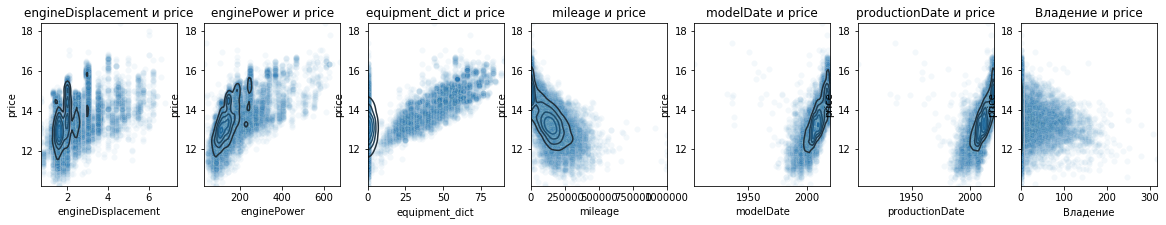

In [66]:
%%time
frac = 0.15
fig, ax = plt.subplots(1,len(num_cols), figsize=(20, 3))
for i,feat in enumerate(num_cols):
    notnamask = externdata_full[[feat,'price']].notna().all(axis=1)
    x = externdata_full[feat][notnamask].sample(frac=frac,random_state=42)
    y = externdata_full.price[notnamask].sample(frac=frac,random_state=42)
    ax[i].set_title(feat + ' и price')
    ax[i].set_xlabel(feat)
    ax[i].set_ylabel("price")
    ax[i].set(xlim=(x.min(), x.max()), ylim=(y.min(), y.max()))
    sns.kdeplot(x, y,ax=ax[i],n_levels=5) #, shade=True, shade_lowest=False
    sns.scatterplot(x, y,ax=ax[i],alpha=0.05)

sp_corr = [spearmanr(externdata_full[x],externdata_full.price,nan_policy='omit')[0] 
     for x in  externdata_full[list(num_cols)].dropna()]
without_na = externdata_full[list(num_cols)+['price']].dropna()
mi = mutual_info_regression(without_na[num_cols],without_na.price)

pd.DataFrame({'MI':mi,'Spearman corr':sp_corr},index = num_cols).T

Как видиим в некоторых количественных признаках габлюдается значительная статистическая зависимость
.... ..   
.... ..   
.... ..

### Детальное изучение
Теперь рассмотрим каждый признак отдельно, а именно 
- постоим график распределения и box-plot признака на test, на всем train и на данных train для марок встречающтхся в test.    
- сравним распределения на test и на данных train для марок встречающтхся в test.  
- посторим график 2-D плотности наблюжений в осях price-числовой признак

Приступим к изучению признаков   

#### engineDisplacement
 *признак описывает обьем двигателя.* 

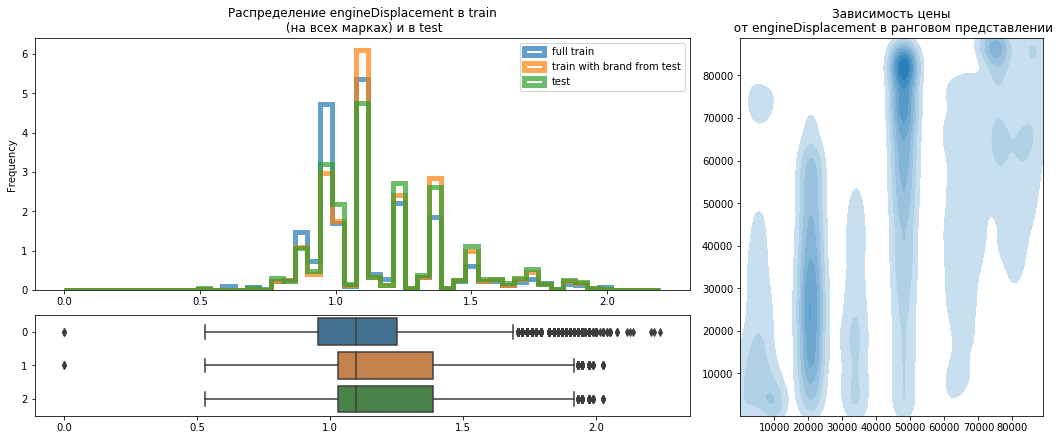

p-value теста Стьюдента о равенстве средних у распределений engineDisplacement в train на брендах, встречающихся в test и в test: 0.000939873572955023


In [107]:
num_visualisation('engineDisplacement',externdata_full)

Как видим    
...   
...   
...   
    
Так же изучим ...

#### enginePower

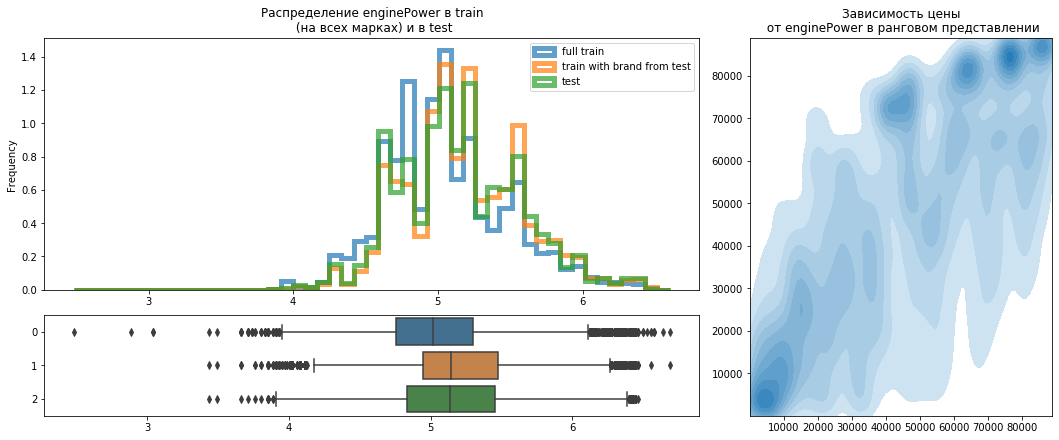

p-value теста Стьюдента о равенстве средних у распределений enginePower в train на брендах, встречающихся в test и в test: 1.401466767295153e-18


In [68]:
num_visualisation('enginePower',externdata_full)

#### equipment_dict

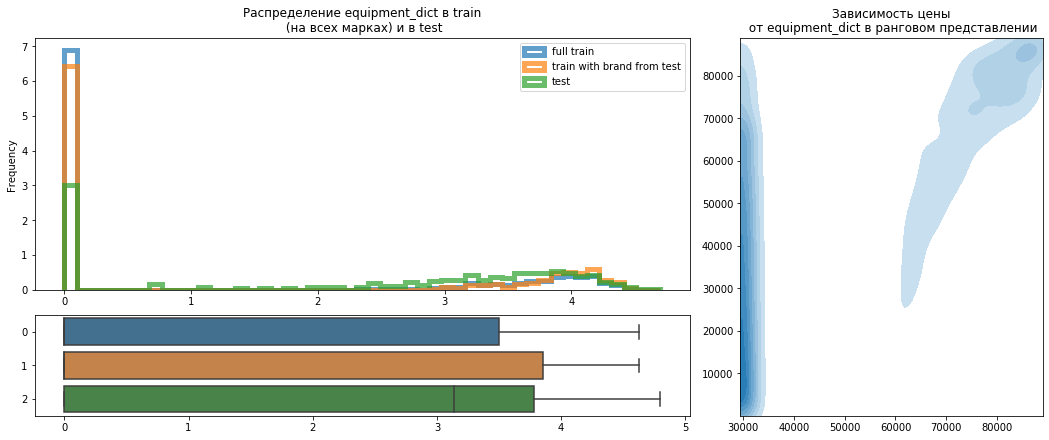

p-value теста Стьюдента о равенстве средних у распределений equipment_dict в train на брендах, встречающихся в test и в test: 0.0


In [69]:
num_visualisation('equipment_dict',externdata_full)

Разделим наблюдения

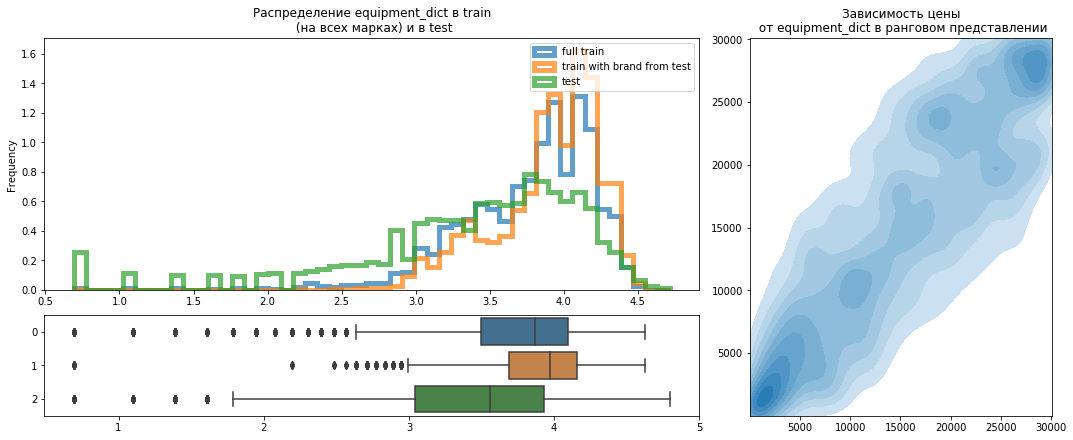

p-value теста Стьюдента о равенстве средних у распределений equipment_dict в train на брендах, встречающихся в test и в test: 0.0


In [71]:
num_visualisation('equipment_dict',externdata_full[externdata_full.equipment_dict!=0])

#### mileage

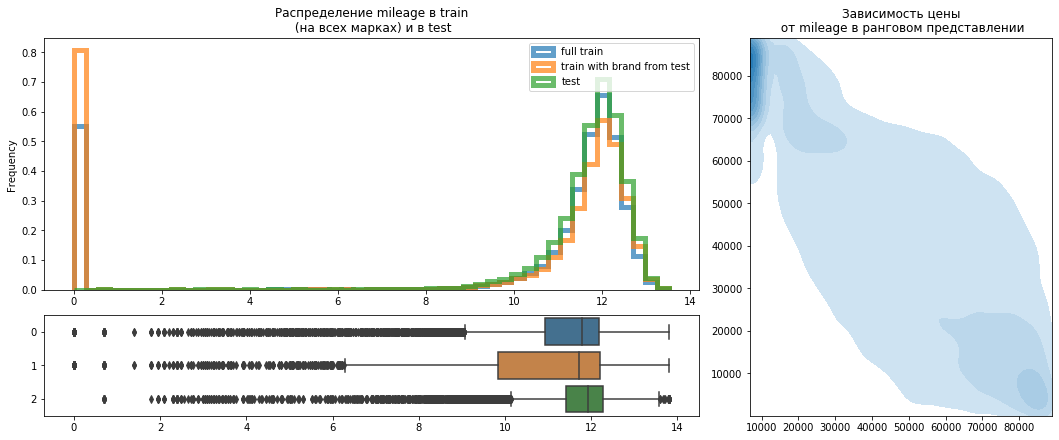

p-value теста Стьюдента о равенстве средних у распределений mileage в train на брендах, встречающихся в test и в test: 0.0


In [72]:
num_visualisation('mileage',externdata_full)

Разделим наблюдения

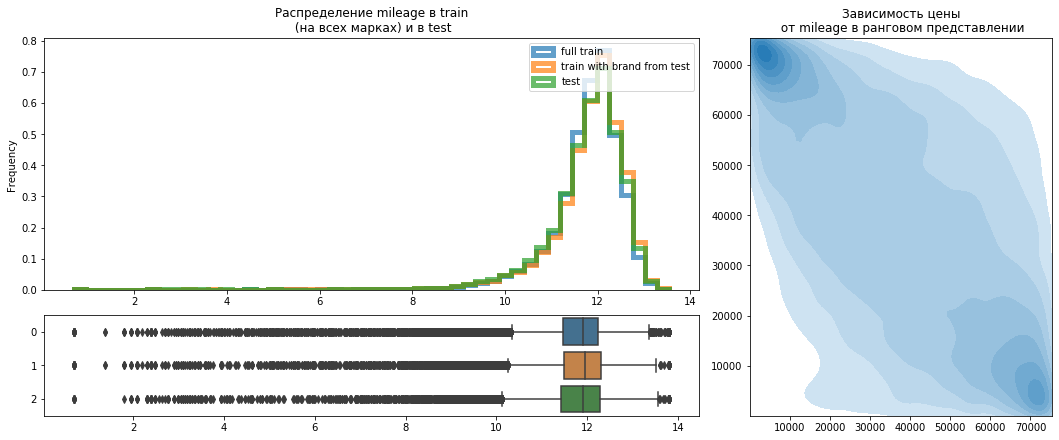

p-value теста Стьюдента о равенстве средних у распределений mileage в train на брендах, встречающихся в test и в test: 2.0674204299441247e-10


In [88]:
num_visualisation('mileage',externdata_full[externdata_full.mileage !=0])

#### modelDate

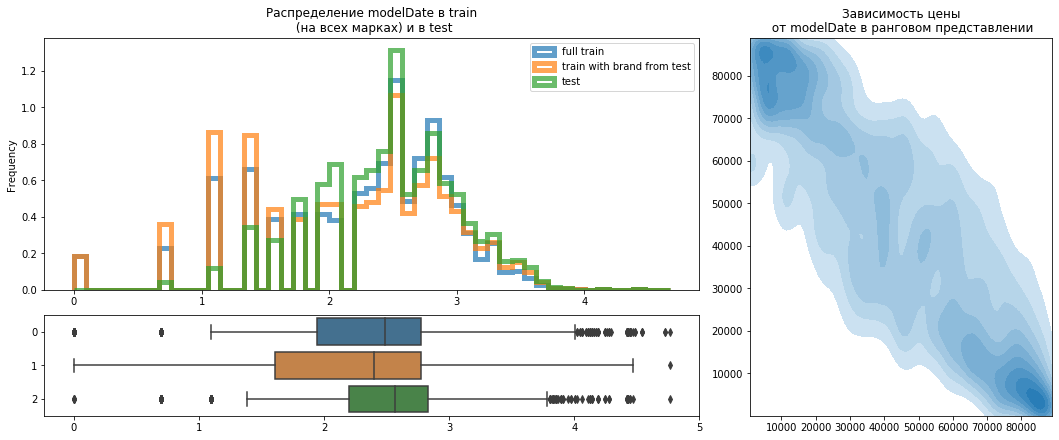

p-value теста Стьюдента о равенстве средних у распределений modelDate в train на брендах, встречающихся в test и в test: 0.0


In [73]:
num_visualisation('modelDate',externdata_full,left_sloping=True)

#### productionDate

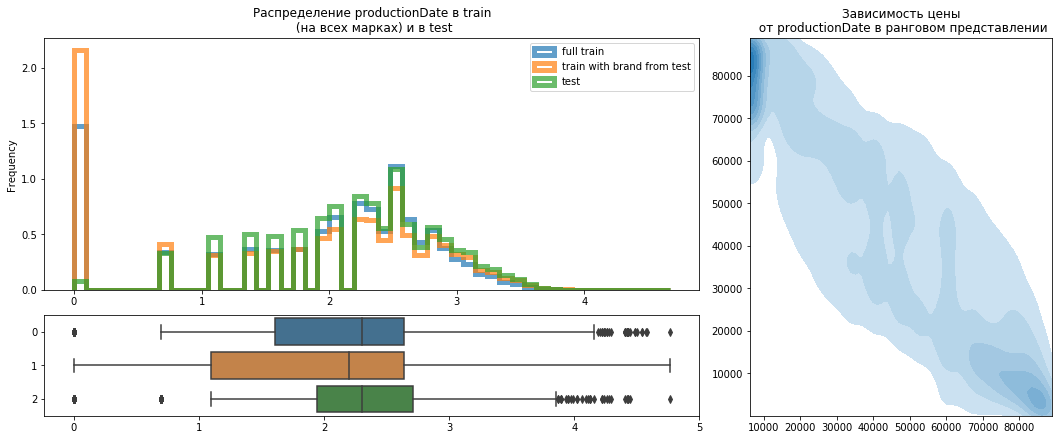

p-value теста Стьюдента о равенстве средних у распределений productionDate в train на брендах, встречающихся в test и в test: 0.0


In [74]:
num_visualisation('productionDate',externdata_full,left_sloping=True)

Разделим наблюдения

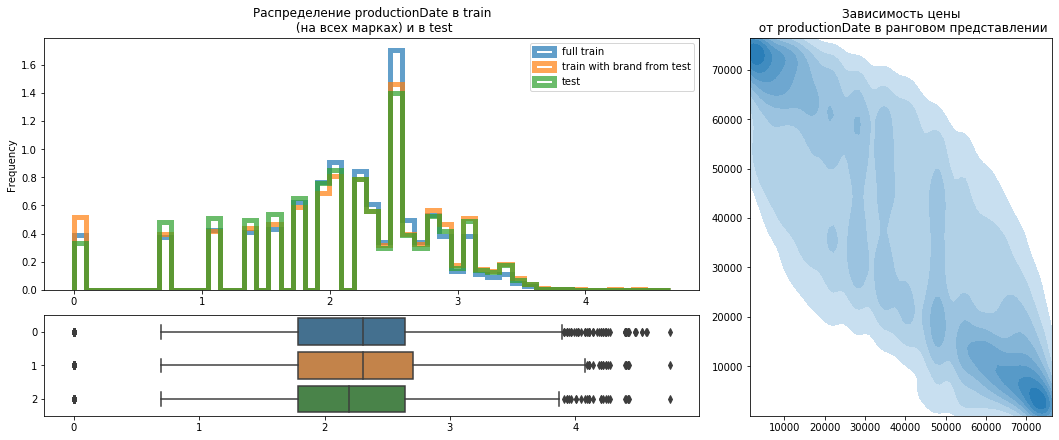

p-value теста Стьюдента о равенстве средних у распределений productionDate в train на брендах, встречающихся в test и в test: 0.015527278910939371


In [92]:
num_visualisation(
    'productionDate',externdata_full[externdata_full.productionDate !=2020],left_sloping=True)

#### Владение

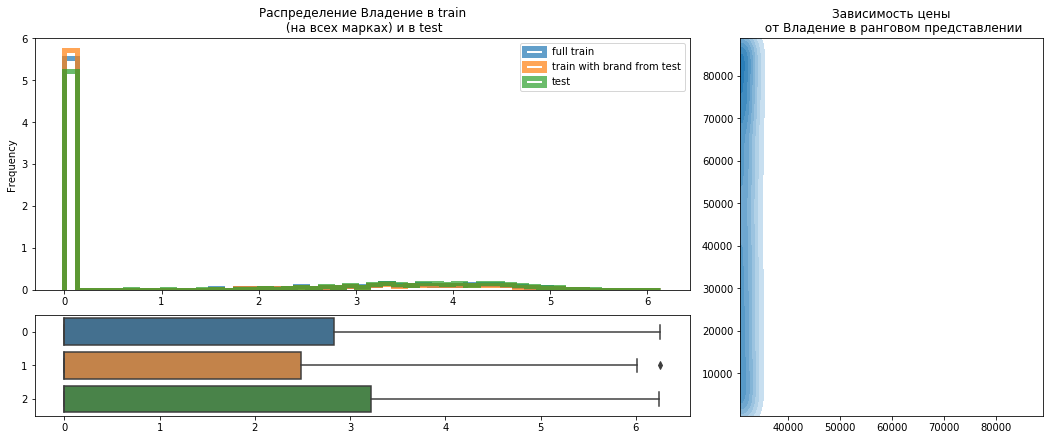

p-value теста Стьюдента о равенстве средних у распределений Владение в train на брендах, встречающихся в test и в test: 6.5454280984573515e-87


In [75]:
num_visualisation('Владение',externdata_full)

Разделим наблюдения

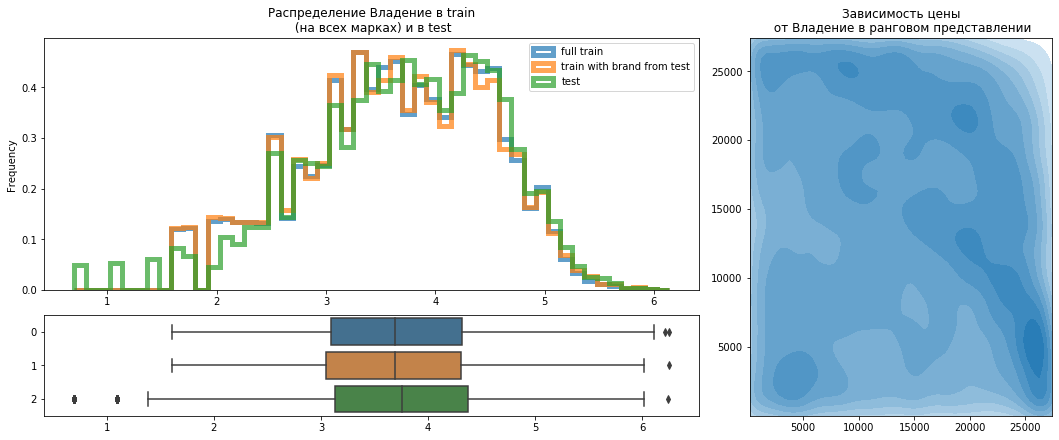

p-value теста Стьюдента о равенстве средних у распределений Владение в train на брендах, встречающихся в test и в test: 4.767503822424397e-07


In [76]:
num_visualisation('Владение',externdata_full[externdata_full.Владение !=0])

### Категориальные

In [93]:
def cats_visualisation(df,annotation=False):
    '''
    визуализация распределений категориальных признаков: 
        - гистограмма распределения признака
    '''
    columns = df.columns
    cols_num = df.shape[1]

    fstr = '\033[1m{}\033[0m, '* (len(columns)-1) + '\033[1m{}\033[0m'
    if annotation: print(('Всего признаков этого типа {}.\nК ним относятся: ' + fstr).format(len(columns),*columns))    
    
    nun = df.nunique()
    single_vis = nun[(nun<100)&(nun>10)]  
    band_vis = nun[(nun<=10)]
    
    fig, axs = plt.subplots(len(single_vis),1,figsize=(14,5*len(single_vis)), sharex=True)
    for i,col in enumerate(single_vis.index):
        sns.countplot(y=col, data=df, ax=axs[i])
        plt.xscale("log")
        
    indent = 0.05
    fig = plt.figure(figsize=(14,3))
    axes_in_band = len(band_vis)
    for i,col in enumerate(band_vis.index):
        row = df[col]        
        
        fig.add_axes([1/axes_in_band*i, 0, 1/axes_in_band-indent, 1])
        plt.title(col)
        sns.countplot(df[col])
        plt.xticks(rotation=70)
        
    plt.show()

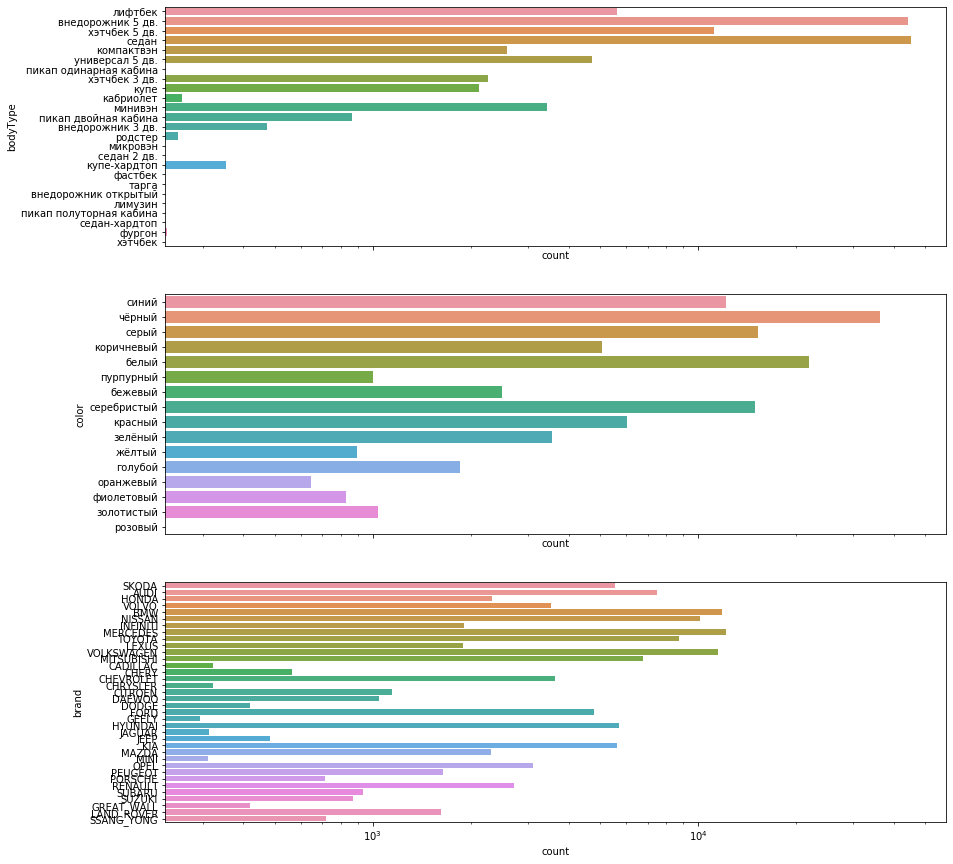

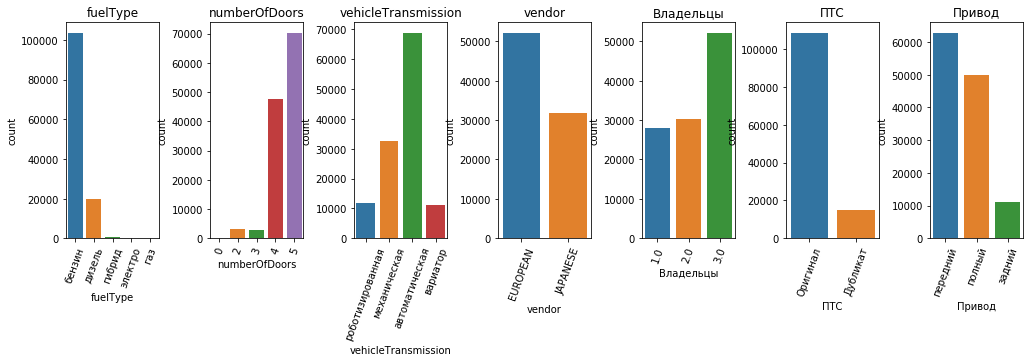

In [94]:
cats_visualisation(externdata_full[cat_cols])

In [12]:
cat_cols

Index(['bodyType', 'color', 'fuelType', 'numberOfDoors', 'vehicleTransmission',
       'vendor', 'Владельцы', 'ПТС', 'Привод', 'model_name', 'brand'],
      dtype='object')

### бинарные

In [13]:
bin_cols

Index(['Руль'], dtype='object')

In [ ]:
cat_cols = data.columns[(num_uniq>2) & (num_uniq<28)].append(pd.Index(['model_name','brand'])) 

In [ ]:
num_cols = data.columns[num_uniq>=28].drop(time_col).drop(['model_name','brand','price'])

# ===========РАЗРАБ=======

%%html
<html>
<body>
<table>
        <tr> 
            <th>Name</th> 
            <th>Country</th> 
            <th>Age</th> 
        </tr> 
        <tr> 
            <td>Sid</td> 
            <td>India</td> 
            <td>22</td> 
        </tr>
        <tr> 
            <td>Dave</td> 
            <td>UK</td> 
            <td>28</td> 
        </tr>
</table>
</body>
</html>

In [ ]:
%lsmagic

In [140]:
externdata_full.columns

Index(['bodyType', 'brand', 'color', 'engineDisplacement', 'enginePower',
       'equipment_dict', 'fuelType', 'mileage', 'modelDate', 'model_name',
       'numberOfDoors', 'productionDate', 'vehicleTransmission', 'vendor',
       'Владельцы', 'Владение', 'ПТС', 'Привод', 'Руль', 'sample', 'price'],
      dtype='object')

In [137]:
num_cols

Index(['engineDisplacement', 'enginePower', 'equipment_dict', 'mileage',
       'modelDate', 'productionDate', 'Владение'],
      dtype='object')

In [152]:
def features_price_scatterplot(df,stud_column,top_column, n_top):
    top = df[top_column].value_counts().index[:n_top]    
    fig, ax = plt.subplots(1,len(top), figsize=(20, 4))

    for i,cat_val in enumerate(top):
        tmp = df[df[top_column]==cat_val]
        x = tmp[stud_column]
        y = tmp.price
        ax[i].scatter(x = x, y = y, alpha=0.3)
        ax[i].set_title('для '+ top_column + ' ' + str(cat_val))
        ax[i].set_xlabel(stud_column)
        ax[i].set_ylabel("price")
#         ax[i].set_yscale( "log")
        xmarg = 0.1*(x.max() - max(x.min(),0))
        ax[i].set_xlim(left=max(x.min(),0)-xmarg,right = x.max()+xmarg)
#         ax[i].set_xmargin(0.2)
    plt.show(x.max()) 

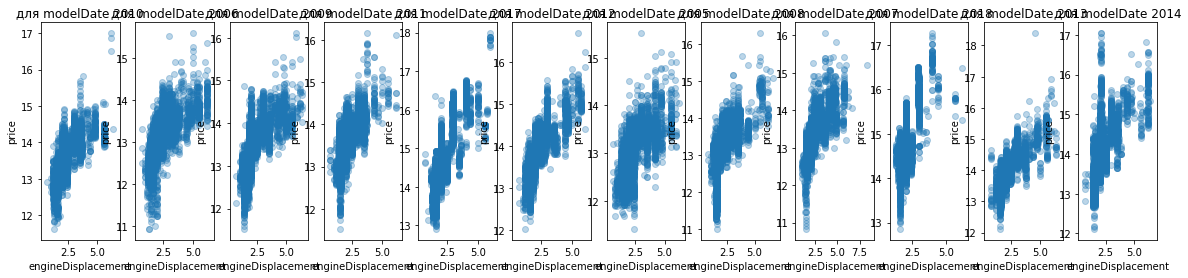

In [147]:
features_price_scatterplot(externdata_full,'engineDisplacement','modelDate',12)

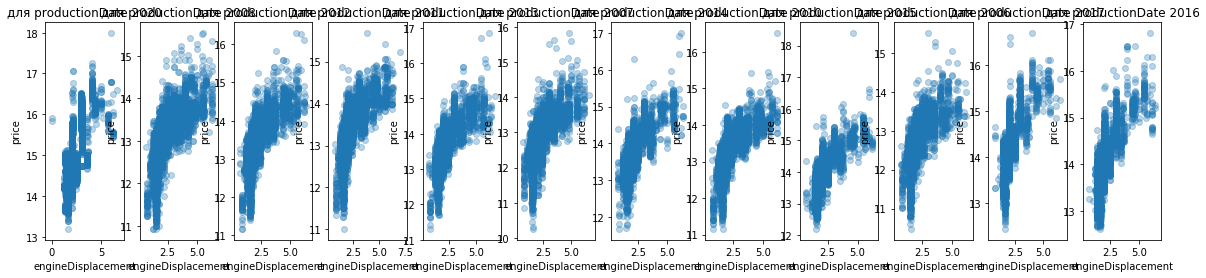

In [148]:
features_price_scatterplot(externdata_full,'engineDisplacement','productionDate',12)

In [144]:
# Поскольку в дальнейшем мы, вероятно, будем среди прочих использовать модели чувствительные к сильно ненормальному распределению признака, то применим к признакам преобразование (`log(x+1)` для скошенных вправо и `log(2022-x)` для сошеных влево).  
# Посмотрим на результат:

# to_log = ['engineDisplacement', 'enginePower', 'equipment_dict','mileage','Владение']
# to_minus_log = ['modelDate', 'productionDate']
# externdata_full[to_log] = np.log(externdata_full[to_log]+1)
# externdata_full[to_minus_log] = np.log(2022 - externdata_full[to_minus_log])

In [ ]:
# Картина улучшилась -  распределения либо стали близки к нормальному, либо скошенность 
# существенно уменьшилась. Далее будем работать спризнаком с учетом преобразования.

# nums_visualisation(np.log(externdata_full[[
#     'engineDisplacement', 'enginePower', 'equipment_dict','mileage','Владение']]+1))

# nums_visualisation(np.log(2022 - externdata_full[['modelDate', 'productionDate']]))

In [70]:
array = np.array([4,2,7,1])
rank = array.argsort().argsort()+1
rank

array([3, 2, 4, 1], dtype=int64)

In [71]:
from scipy.stats import rankdata
a = [4, 2, 7, 1]
rankdata(a)

array([3., 2., 4., 1.])

In [ ]:
x = 
y = externdata_full.price.

In [73]:
externdata_full.price.argsort().argsort()

0             0
1         23407
2         23406
3         23405
4         23404
          ...  
124058    65815
124059    68308
124060    94857
124061    96619
124062    94661
Name: price, Length: 124063, dtype: int64

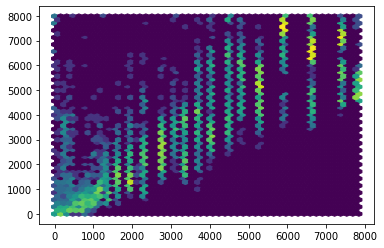

In [222]:
dff = externdata_full[externdata_full.brand == "MERCEDES"]
x = rankdata(dff.modelDate[dff.price.dropna().index] ) # ,method='ordinal'
y = rankdata(dff.price.dropna())
plt.hexbin(x,y, gridsize=50,bins='log')

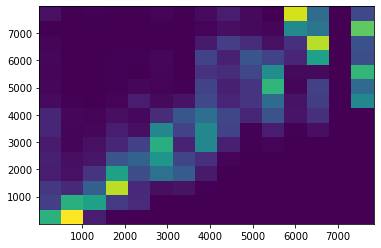

In [50]:
dff = externdata_full[externdata_full.brand == "MERCEDES"]
x = rankdata(dff.modelDate[dff.price.dropna().index] ) # ,method='ordinal'
y = rankdata(dff.price.dropna())
plt.hist2d(x,y,bins=15);

In [219]:
externdata_full.brand.unique()

array(['SKODA', 'AUDI', 'HONDA', 'VOLVO', 'BMW', 'NISSAN', 'INFINITI',
       'MERCEDES', 'TOYOTA', 'LEXUS', 'VOLKSWAGEN', 'MITSUBISHI',
       'CADILLAC', 'CHERY', 'CHEVROLET', 'CHRYSLER', 'CITROEN', 'DAEWOO',
       'DODGE', 'FORD', 'GEELY', 'HYUNDAI', 'JAGUAR', 'JEEP', 'KIA',
       'MAZDA', 'MINI', 'OPEL', 'PEUGEOT', 'PORSCHE', 'RENAULT', 'SUBARU',
       'SUZUKI', 'GREAT_WALL', 'LAND_ROVER', 'SSANG_YONG'], dtype=object)

In [98]:
test.productionDate.max()

2020

In [101]:
df_kaggle.productionDate.max()

2020

In [81]:
df_kaggle.astype(str).nunique()

bodyType                  103
brand                      12
color                      16
fuelType                    6
modelDate                  70
name                     2898
numberOfDoors               6
productionDate             72
vehicleConfiguration     1362
vehicleTransmission         5
engineDisplacement        412
enginePower               317
description             41877
mileage                  9787
Комплектация             2903
Привод                      4
Руль                        2
Состояние                   1
Владельцы                   4
ПТС                         3
Таможня                     1
Владение                  272
price                    6461
start_date              39528
hidden                      1
model                     554
dtype: int64

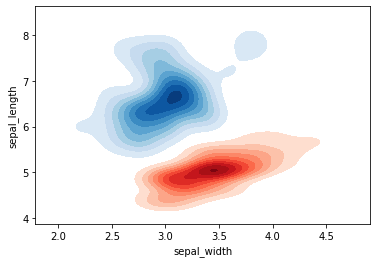

In [20]:
iris = sns.load_dataset("iris")
setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "virginica"]
sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                  cmap="Reds", shade=True, shade_lowest=False)
sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                  cmap="Blues", shade=True, shade_lowest=False)

In [ ]:
feat = num_cols[1]
if 1:
    kkk = externdata_full[[feat,'price']].dropna()
    x = kkk[feat][:1000].values
    y = kkk.price[:1000].values
sns.kdeplot(x, y)#, shade=True, shade_lowest=False
# sns.scatterplot(x, y,alpha=0.1)
plt.show()

%%time
n = 0.01
num_rows = 2
num_columns = math.ceil(len(num_cols)/2)
fig, ax = plt.subplots(num_rows,num_columns, figsize=(20,8))
for i,feat in enumerate(num_cols):
    notnamask = externdata_full[[feat,'price']].notna().all(axis=1)
    x = externdata_full[feat][notnamask].sample(frac=n,random_state=42)
    y = externdata_full.price[notnamask].sample(frac=n,random_state=42)
    axx = i//num_columns
    axy = i%num_columns
    ax[axx,axy].set_title(feat + ' и price')
    ax[axx,axy].set_xlabel(feat)
    ax[axx,axy].set_ylabel("price")
    ax[axx,axy].set(xlim=(x.min(), x.max()), ylim=(y.min(), y.max()))
    sns.kdeplot(x, y,ax=ax[axx,axy],n_levels=5) #, shade=True, shade_lowest=False
    sns.scatterplot(x, y,ax=ax[axx,axy],alpha=0.3)
#     ax[i].contour([X, Y,] Z, [levels], **kwargs)

In [ ]:
%%time
frac = 0.15
fig, ax = plt.subplots(1,len(num_cols), figsize=(20, 3))
for i,feat in enumerate(num_cols):
    notnamask = externdata_full[[feat,'price']].notna().all(axis=1)
    x = externdata_full[feat][notnamask].sample(frac=frac,random_state=42)
    y = externdata_full.price[notnamask].sample(frac=frac,random_state=42)
    ax[i].set_title(feat + ' и price')
    ax[i].set_xlabel(feat)
    ax[i].set_ylabel("price")
    ax[i].set(xlim=(x.min(), x.max()), ylim=(y.min(), y.max()))
    sns.kdeplot(x, y,ax=ax[i],n_levels=5) #, shade=True, shade_lowest=False
    sns.scatterplot(x, y,ax=ax[i],alpha=0.1)

In [ ]:
# sns.pairplot(externdata_full[list(num_cols) + ['price']],
#              x_vars=list(num_cols) ,
#              y_vars=['price'],
#              aspect=0.7)

In [52]:
# признаки для группировки изучаемого признака
feats_to_group = ['bodyType', 'brand', 'color', 'engineDisplacement',
       'equipment_dict', 'fuelType', 'modelDate', 'model_name',
       'numberOfDoors', 'productionDate', 'vehicleTransmission', 'vendor',
       'Владельцы', 'Владение', 'ПТС', 'Привод', 'Руль', 'price']
feats_to_bin = [ 'mileage','enginePower']
# =========================================================================
for num_feat in num_cols[:1]:
    print (num_feat)
    df = externdata_full[externdata_full['sample']==1].dropna(subset=[num_feat,'price'])
    for to_group in feats_to_group[:5]:
        if to_group == num_feat: continue
        groupped = df.groupby(to_group)
        groupped_mi= groupped.apply(
            lambda x: mutual_info_regression(x[[num_feat]],x.price)[0] *len(x)/len(df)
            if len(x)>4
            else 0 )
        print(groupped_spcorr.sort_values(ascending=False)[:])
        print('--------------------')
# =========================================================================
for num_feat in num_cols[:1]:
    print (num_feat)
    df = externdata_full[externdata_full['sample']==1].dropna(subset=[num_feat,'price'])
    for to_group in feats_to_group[:]:
        if to_group == num_feat: continue
        groupped = df.groupby(to_group)
        groupped_spcorr = groupped.apply(
            lambda x: spearmanr(x[[num_feat]],x.price)[0]*len(x)/len(df) 
            if pd.notna(spearmanr(x[[num_feat]],x.price)[0])
            else 0 )
        print(groupped_spcorr.sort_values(ascending=False)[:3])
        print(groupped_spcorr.mean(),spearmanr(df[num_feat],df.price)[0])       
        print('--------------------')
        
# =========================================================================
# spearmanr
num_feat = 'engineDisplacement'
to_gr_feat = 'modelDate'
df = externdata_full[externdata_full['sample']==1].dropna(subset=[num_feat,'price']) 
groupped = df.groupby(to_gr_feat)
#***********************************************
rst = groupped.apply(lambda x: spearmanr(x[[num_feat]],x.price)[0] *len(x)/len(df)
               if pd.notna(spearmanr(x[[num_feat]],x.price)[0])
               else 0 )

# print(rst.sum())
srt_rst = abs(rst).sort_values(ascending=False)
to_vis = srt_rst.index[:3]
to_vis

fig, ax = plt.subplots(1,len(to_vis), figsize=(15, 6))
for i,to_gr in enumerate(to_vis):
    imd_vis = df.index[df[to_gr_feat] == to_gr]
    x = df[num_feat][imd_vis]
    y = df.price[imd_vis]
#     x = externdata_full[feat][notnamask].sample(frac=frac,random_state=42)
#     y = externdata_full.price[notnamask].sample(frac=frac,random_state=42)    
    ax[i].set_title(num_feat + ' и ' + str(to_gr_feat) + '=' + str(to_gr))
    ax[i].set_xlabel(feat)
    ax[i].set_ylabel("price")
    ax[i].set(xlim=(x.min(), x.max()), ylim=(y.min(), y.max()))
#     sns.kdeplot(x, y,ax=ax[i],n_levels=5) #, shade=True, shade_lowest=False
    sns.scatterplot(x, y,ax=ax[i],alpha=0.05)
#     print(to_gr)

In [132]:
# обьединение мелких категорий
val_cnts = df.modelDate.value_counts().sort_index()
new_val_cnts = pd.Series(val_cnts.index,val_cnts.index)
from_year = val_cnts.index[0]

for year, cnt in zip(val_cnts.index,val_cnts):
    if val_cnts.loc[from_year:year].sum() >= 5: 
        new_val_cnts.loc[from_year:year] = year
        from_year = year+1
        
new_val_cnts.head()

1904    1927
1908    1927
1927    1927
1932    1936
1934    1936
dtype: int64

In [131]:
# черновик двухфакторного
column = 'engineDisplacement'
by_feat = 'modelDate'
df = externdata_full[externdata_full['sample']==1].dropna(subset=[column,'price'])

column = 'engineDisplacement'
by_feat = 'modelDate'
df = externdata_full[externdata_full['sample']==1].dropna(subset=[column,'price'])
df.modelDate = df.modelDate.map(new_val_cnts)
gr = df.groupby(by_feat)
gr_mi = gr.apply(lambda x: mutual_info_regression(x[[column]],x.price))
gr_spcorr = gr.apply(lambda x: spearmanr(x[[column]],x.price))
print('MI ',gr_mi.mean()[0],gr_mi.std())
print('Spearman',gr_spcorr.apply(lambda x: x[0]).mean(),gr_spcorr.apply(lambda x: x[0]).std())

# =========== TEST ===========

In [ ]:
import scipy.stats as ss


def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))



In [11]:
from scipy.stats import chi2_contingency

confusion_mtrx = pd.crosstab(x1, x2)
confusion_mtrx
chi2 = chi2_contingency(confusion_mtrx, correction=False)[0]
n = np.sum(confusion_mtrx.values)
min_dim = min(confusion_mtrx.shape)-1
#calculate Cramer's V 
V_cr = np.sqrt((chi2/n) / min_dim)
V_cr


col_0,A,B
row_0,,
1,1,1
2,1,0
3,0,1


In [50]:
x1 = pd.Series([1,2,3,3,2])
x2 = pd.Series([5,5,2,2,2])

cramers_v(x1, x2)

0.7637626158259734

In [ ]:
cramers_v(x1, x2)

In [39]:
def cramers_v(row1,row2):
    """ 
    Вычисляет V Крамера двух категориальных признаков
    Требует chi2_contingency from scipy.stats в области видимости
    Параметры:
    row1 - 1d array like, 1-ый категориальный признак
    row2 - 1d array like, 2-ой категориальный признак
    """
    confusion_mtrx = pd.crosstab(row1, row2)
    chi2 = chi2_contingency(confusion_mtrx)[0]
    n = np.sum(confusion_mtrx.values)
    min_dim = min(confusion_mtrx.shape)-1
    return np.sqrt((chi2/n) / min_dim)

In [99]:
cramers_v(externdata_full.vehicleTransmission, externdata_full.vendor)

0.43143739798712966

In [95]:
externdata_full

cat_cols

Index(['bodyType', 'color', 'fuelType', 'numberOfDoors', 'vehicleTransmission',
       'vendor', 'Владельцы', 'ПТС', 'Привод', 'model_name', 'brand'],
      dtype='object')